In [226]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings

In [227]:
from sklearn.preprocessing import LabelEncoder
from category_encoders import BinaryEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import ConfusionMatrixDisplay , confusion_matrix , accuracy_score

In [228]:
warnings.filterwarnings('ignore')

In [229]:
%matplotlib inline 

In [288]:
sns.set_theme(context = 'paper' , style = 'white' , palette = 'Paired' , font_scale = 1.1 , 
             rc = {'figure.figsize' : (8 , 7)})

In [231]:
df = pd.read_csv('Stars.csv')
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,Brown Dwarf
1,3042,0.000500,0.1542,16.60,Red,M,Brown Dwarf
2,2600,0.000300,0.1020,18.70,Red,M,Brown Dwarf
3,2800,0.000200,0.1600,16.65,Red,M,Brown Dwarf
4,1939,0.000138,0.1030,20.06,Red,M,Brown Dwarf


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 13.2+ KB


In [233]:
df.isnull().mean()*100

Temperature       0.0
L                 0.0
R                 0.0
A_M               0.0
Color             0.0
Spectral_Class    0.0
Type              0.0
dtype: float64

In [234]:
df.duplicated().sum()

0

In [235]:
df.columns

Index(['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class', 'Type'], dtype='object')

In [236]:
df['Temperature'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Temperature,240.0,10497.4625,9552.425037,1939.0,3344.25,5776.0,15055.5,40000.0


<AxesSubplot:xlabel='Temperature'>

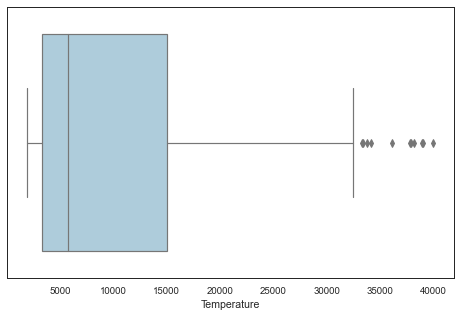

In [237]:
sns.boxplot(df['Temperature'])

<AxesSubplot:xlabel='Temperature', ylabel='Density'>

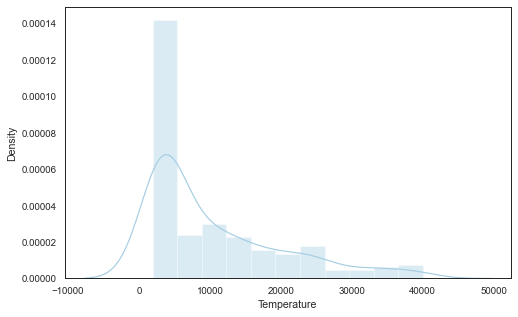

In [238]:
sns.distplot(df['Temperature'])

In [239]:
df['L'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
L,240.0,107188.361635,179432.24494,0.00008,0.000865,0.0705,198050.0,849420.0


<AxesSubplot:xlabel='L'>

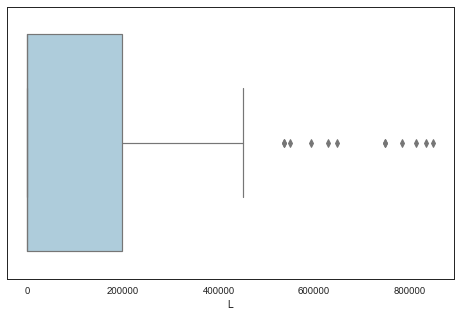

In [240]:
sns.boxplot(df['L'])

<AxesSubplot:xlabel='L', ylabel='Density'>

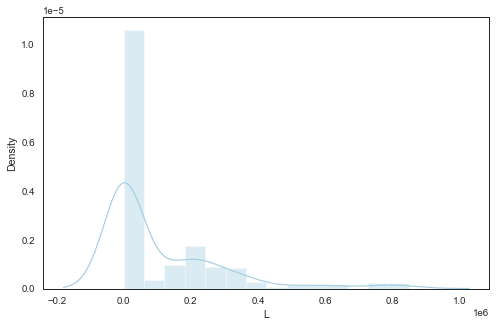

In [241]:
sns.distplot(df["L"])

In [242]:
df['R'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
R,240.0,237.157781,517.155763,0.0084,0.10275,0.7625,42.75,1948.5


<AxesSubplot:xlabel='R'>

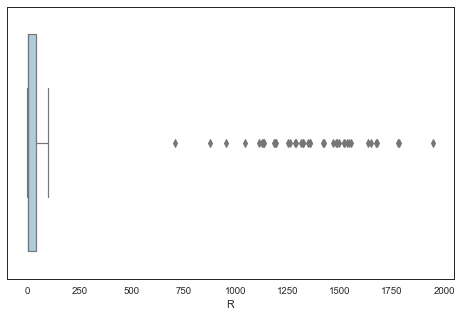

In [243]:
sns.boxplot(df['R'])

<AxesSubplot:xlabel='R', ylabel='Density'>

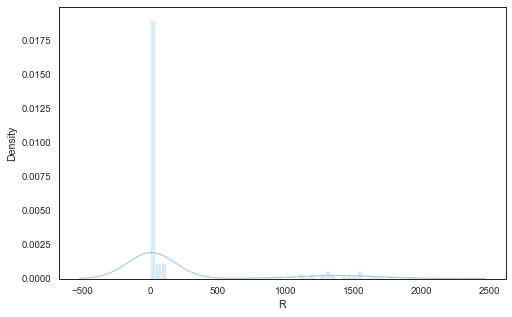

In [244]:
sns.distplot(df['R'])

In [245]:
df['A_M'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
A_M,240.0,4.382396,10.532512,-11.92,-6.2325,8.313,13.6975,20.06


<AxesSubplot:xlabel='A_M'>

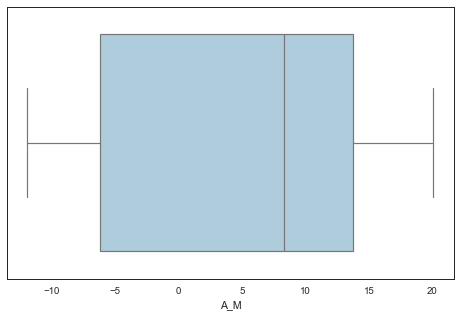

In [246]:
sns.boxplot(df['A_M'])

<AxesSubplot:xlabel='A_M', ylabel='Density'>

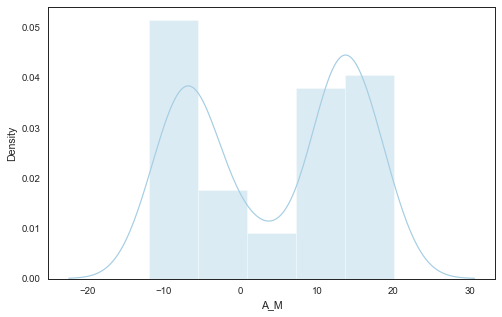

In [247]:
sns.distplot(df['A_M'])

In [248]:
df['Color'].value_counts(normalize = True).to_frame().T*100

,Red,Blue,Blue-white,Blue White,yellow-white,White,Blue white,white,Yellowish White,yellowish,Whitish,Orange,White-Yellow,Pale yellow orange,Yellowish,Orange-Red,Blue-White
Color,46.666667,23.333333,10.833333,4.166667,3.333333,2.916667,1.666667,1.25,1.25,0.833333,0.833333,0.833333,0.416667,0.416667,0.416667,0.416667,0.416667


In [249]:
df['Color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish',
       'Yellowish', 'Orange-Red', 'Blue-White'], dtype=object)

In [250]:
df['Color'] = df['Color'].apply(lambda x : 'Blue White' if x in ['Blue white' , 'Blue-white' , 'Blue-White'] else x)

In [251]:
df['Color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White',
       'Pale yellow orange', 'Blue', 'Whitish', 'yellow-white', 'Orange',
       'White-Yellow', 'white', 'yellowish', 'Yellowish', 'Orange-Red'],
      dtype=object)

In [252]:
df['Color'] = df['Color'].apply(lambda x : 'White' if x in ['Whitish', 'white'] else x )

In [253]:
df['Color'] = df['Color'].apply(lambda x : 'yellow-white' if x in[ 'White-Yellow' , 'Yellowish White'] else x )

In [254]:
df['Color'] = df['Color'].apply(lambda x : x.lower())

In [255]:
df['Color'].value_counts()

red                   112
blue                   56
blue white             41
white                  12
yellow-white           12
yellowish               3
orange                  2
pale yellow orange      1
orange-red              1
Name: Color, dtype: int64

In [256]:
df['Color'] = df['Color'].apply(lambda x : 'other' if x in ['yellowish','orange','pale yellow orange' , 'orange-red'] else x )

In [257]:
df['Spectral_Class'].unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

In [258]:
df['Spectral_Class'].value_counts()

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral_Class, dtype: int64

In [259]:
df['Spectral_Class'] = df['Spectral_Class'].apply(lambda x : 'other' if x in ['K' , 'G']else x )

In [260]:
df['Type'].value_counts()

Brown Dwarf      40
Red Dwarf        40
White Dwarf      40
Main Sequence    40
Supergiant       40
Hypergiant       40
Name: Type, dtype: int64

<AxesSubplot:xlabel='Type', ylabel='count'>

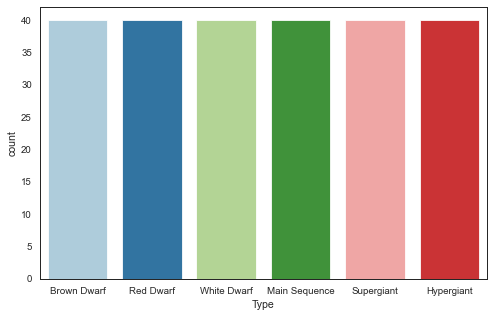

In [261]:
sns.countplot(df['Type'])

In [262]:
le = LabelEncoder()

In [263]:
df['Type'] = le.fit_transform(df['Type'])

In [264]:
col_to_encd = ['Color' , 'Spectral_Class']

In [265]:
encdr = BinaryEncoder()

In [266]:
df = pd.concat([df , encdr.fit_transform(df[col_to_encd])] , axis = 1 )

In [267]:
df.drop(col_to_encd , axis = 1 , inplace = True)

In [364]:
x = df.drop(['Type'] , axis = 1 )
y = df['Type']

In [365]:
x_train , x_test , y_train , y_test = train_test_split(x , y , random_state = 7 ,
                                                       test_size = 0.2 , shuffle = True ,
                                                       stratify = y)

In [366]:
col_to_scl = ['Temperature' , 'L' , 'R' , 'A_M']

In [367]:
sclr = RobustScaler()

In [368]:
x_train[col_to_scl] = sclr.fit_transform(x_train[col_to_scl])

In [369]:
x_test[col_to_scl] = sclr.transform(x_test[col_to_scl])

In [370]:
poly = PolynomialFeatures(degree = 3)

In [371]:
x_train = poly.fit_transform(x_train)

In [372]:
model = LogisticRegression(multi_class = 'ovr')

In [373]:
model.fit(x_train , y_train)

LogisticRegression(multi_class='ovr')

In [374]:
y_train_prd = model.predict(x_train)

In [375]:
y_test_prd = model.predict(poly.transform(x_test))

###### Train acc

In [376]:
accuracy_score(y_true = y_train , y_pred = y_train_prd)

1.0

###### Test acc

In [377]:
accuracy_score(y_true = y_test , y_pred = y_test_prd)

1.0

In [378]:
cm = confusion_matrix(y_true = y_train , y_pred = y_train_prd)

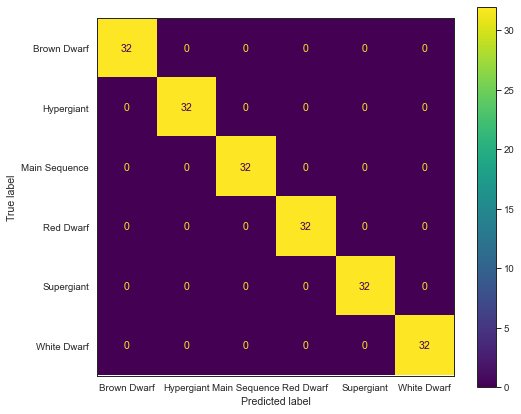

In [379]:
ConfusionMatrixDisplay(cm , display_labels = le.inverse_transform(model.classes_)).plot()

In [380]:
cm = confusion_matrix(y_true = y_test , y_pred = y_test_prd )

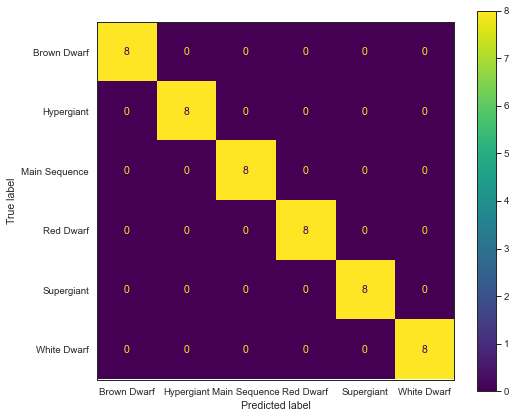

In [381]:
ConfusionMatrixDisplay(cm , display_labels = le.inverse_transform(model.classes_)).plot()